Data Science - Exploratory Data Analysis (EDA)<br>
By : <br>
Mohammad Fahry Sholahuddin<br>
06.2019.1.07172<br>

In [ ]:
!pip install sastrawi -q
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from plotly.offline import init_notebook_mode, iplot

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud
from textblob import TextBlob 

#import plotly.plotly as py
from plotly import tools
import seaborn as sns
import pandas as pd
import string, os, random

%matplotlib inline
import requests

# Dataset

Dataset opini film diambil dari

```
Antinasari, P., Perdana, R., & Fauzi, M. (2017). Analisis Sentimen Tentang Opini Film Pada Dokumen Twitter Berbahasa Indonesia Menggunakan Naive Bayes Dengan Perbaikan Kata Tidak Baku. Jurnal Pengembangan Teknologi Informasi Dan Ilmu Komputer, 1(12), 1733-1741. Diambil dari https://j-ptiik.ub.ac.id/index.php/j-ptiik/article/view/629
```



In [ ]:
# get dataset
!wget https://gist.githubusercontent.com/yasirabd/08928c274fbb2620c170acc4f47fc6d3/raw/91c01187e8a40b3c3c76e8ca087ff9e2dc62cf0d/opini_film.csv

--2022-10-22 23:48:31--  https://gist.githubusercontent.com/yasirabd/08928c274fbb2620c170acc4f47fc6d3/raw/91c01187e8a40b3c3c76e8ca087ff9e2dc62cf0d/opini_film.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22484 (22K) [text/plain]
Saving to: ‘opini_film.csv.3’

opini_film.csv.3    100%[===================>]  21.96K  --.-KB/s    in 0.001s  

2022-10-22 23:48:31 (21.1 MB/s) - ‘opini_film.csv.3’ saved [22484/22484]



In [ ]:
# load dataset into pandas
data = pd.read_csv('opini_film.csv')
data.head()

,Id,Sentiment,Text Tweet
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,negative,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang..."


In [ ]:
preprocessed_data = data.copy()

In [ ]:
preprocessed_data.head()

,Id,Sentiment,Text Tweet
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,negative,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang..."


# Exploratory Data Analysis (EDA)

In [ ]:
# check missing value
data.isnull().sum()

Id            0
Sentiment     0
Text Tweet    0
dtype: int64

In [ ]:
# check the number of positive and negative tweets
data['Sentiment'].value_counts()

negative    100
positive    100
Name: Sentiment, dtype: int64

- Pada wordcloud dokumen bersentimen positive muncul kata-kata sentimen positive seperti `bagus`, `keren`, `menarik`, dan `bangga`.
- Pada wordcloud dokumen bersentimen negative muncuk kata-kata sentimen negative seperti `kecewa`, `jelek`, `kurang`, dan `parah`.
- Terdapat *stopwords* pada dokumen bersentimen positive dan negative seperti kata-kata `yang`, `ini`, `juga`, dan `aja` yang perlu dihapus pada tahap *preprocessing*.

## 2. Feature Engineering 

### 2.1 Statistical Count Features from headline text

1. **Word Count** - Total number of words in the headline  
2. **Character Count** - Total number of characters in the headline excluding spaces   
3. **Word Density** - Average length of the words used in the headline  
4. **Upper-Case to Lower-Case Words ratio** - ratio of upper case words used and lower case words used in the text

#### 2.1 Generate Statistical Count Features

In [ ]:
preprocessed_data['word_count'] = preprocessed_data['Text Tweet'].apply(lambda x : len(x.split()))
preprocessed_data['char_count'] = preprocessed_data['Text Tweet'].apply(lambda x : len(x.replace(" ","")))
preprocessed_data['word_density'] = preprocessed_data['word_count'] / (preprocessed_data['char_count'] + 1)

preprocessed_data[['word_count', 'char_count', 'word_density']].head(10)

,word_count,char_count,word_density
0,11,62,0.174603
1,12,59,0.200000
2,9,57,0.155172
3,11,50,0.215686
4,19,91,0.206522
5,13,76,0.168831
6,19,100,0.188119
7,12,58,0.203390
8,8,33,0.235294
9,21,115,0.181034


#### 2.2 Generate Text Features - Sentiment Polarity

In [ ]:
# function to obtain the sentiment of the headline using textblob package
def get_polarity(text):
    try:
        pol = TextBlob(text).sentiment.polarity
    except:
        pol = 0.0
    return pol

# I have already computed the sentiments and saved the file if file is not present it will compute the sentiment in real time which could be time taking
preprocessed_data['polarity'] = preprocessed_data['Text Tweet'].apply(get_polarity)
preprocessed_data

,Id,Sentiment,Text Tweet,word_count,char_count,word_density,polarity
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...,11,62,0.174603,0.0
1,2,negative,Film king Arthur ini film paling jelek dari se...,12,59,0.200000,0.0
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...,9,57,0.155172,0.0
3,4,negative,Ane ga suka fast and furious..menurutku kok je...,11,50,0.215686,0.2
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang...",19,91,0.206522,0.0
...,...,...,...,...,...,...,...
195,196,positive,Fargo juga adaptasi dari film yang cukup berha...,13,85,0.151163,1.0
196,197,positive,637.000 waw ini sangat keren flm horor dng jum...,17,89,0.188889,0.0
197,198,positive,@filmziarah film yang tenang dan menghanyutkan...,20,121,0.163934,0.0
198,199,positive,Film yg amat menarik. Kisah cinta & kesetiaan ...,20,119,0.166667,0.0


## 3. Exploratory Analysis

3.1. Text Tweet's Word Count Distribution<br>
3.2. Text Tweet's Character Count Distribution<br>
3.3. Text Tweet's Average Word Density Distribution<br>
3.4. Top Positive vs Top Negative Words Used in the Text Tweet's<br>

###3.1 Text Tweet's Word Count Distribution

In [ ]:
xwords = preprocessed_data.word_count
trace1 = go.Histogram(x=xwords, opacity=0.65, name="Text Tweet", marker=dict(color='rgba(171, 50, 96, 0.6)'))
data = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Word Count Text Tweet',
                   xaxis=dict(title='Word Count'),
                   yaxis=dict(title='Numer of Text Tweet'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

**Inference**
> - Dari grafik di atas, dapat digambarkan bahwa sebagian besar pengguna lebih suka menuis tweet yang berisi sekitar 18-19 kata.
> - Sangat sedikit tweet yang memiliki jumlah kata yang sangat sedikit

###3.2 Text Tweet's Character Count Distribution


In [ ]:
xchars = preprocessed_data.char_count
trace1 = go.Histogram(x=xchars, opacity=0.65, name="Word Count", marker=dict(color='rgba(12, 50, 196, 0.6)'))
data = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Char Count of Text Tweet',
                   xaxis=dict(title='Char Count'),
                   yaxis=dict( title='Numer of Text Tweet'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

**Inference**
> - Dari grafik di atas, dapat digambarkan bahwa sebagian besar pengguna lebih suka menuis tweet yang berisi sekitar 50 karakter.

###3.3 Text Tweet's Average Word Density Distribution

In [ ]:
xwd = preprocessed_data.word_density
trace1 = go.Histogram(x=xwd, opacity=0.65, name="Word Count", marker=dict(color='rgba(0, 0, 0, 0.6)'))
data = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Word Density of Tweet Text',
                   xaxis=dict(title='Word Density'),
                   yaxis=dict( title='Numer of Tweet Text'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

###3.4 Top Positive vs Top Negative Words Used in the Text Tweet's

In [ ]:
sorteddf = preprocessed_data.sort_values(by='polarity')
posdf = sorteddf.tail(5000)
negdf = sorteddf.head(5000)

posdf[['Text Tweet']].tail(10)

,Text Tweet
140,Lapor mbah @CenayangFilm film ini keren. Worth...
183,ga sabar nunggu Bluray nya. pasti banyak speci...
141,thanks for today @andibowooo :-* film #TheBoss...
17,satu-satunya kerugian nonton film action itu.....
115,Bertambah lagi film Indonesia yang bakal jadi ...
169,Salah satu film yg gak pernah bikin bosen dito...
106,Film kartini.. Meski aku agak telat nontonnya....
80,Flm apa ini :) arah dan tujuannya nggak jelas....
13,"Btw Danur jelek banget, gausah ditonton Hans @..."
195,Fargo juga adaptasi dari film yang cukup berha...


In [ ]:
negdf[['Text Tweet']].head(10)

,Text Tweet
96,"lalu setelah film berakhir, mikir ''ngapain no..."
51,Sebenarnya gamau berekspektasi tinggi sih dari...
8,Banyak yg kecewa abis nonton film ini :(
88,"Agak kecewa sama film Danur, diluar ekspektasi :("
126,"@CenayangFilm mbah, cucumu barusan nonton Nigh..."
48,Nonton alien : covenant di @cinema21 mall @Mci...
134,Kalo belom nonton Kartini harus banget sih non...
7,Kecewa parah sama film the guys. Dear @raditya...
41,1. Insidious (2010) Meski creepy dan bagian aw...
70,"Film The Mummy menurut gue gak sesuai harapan,..."


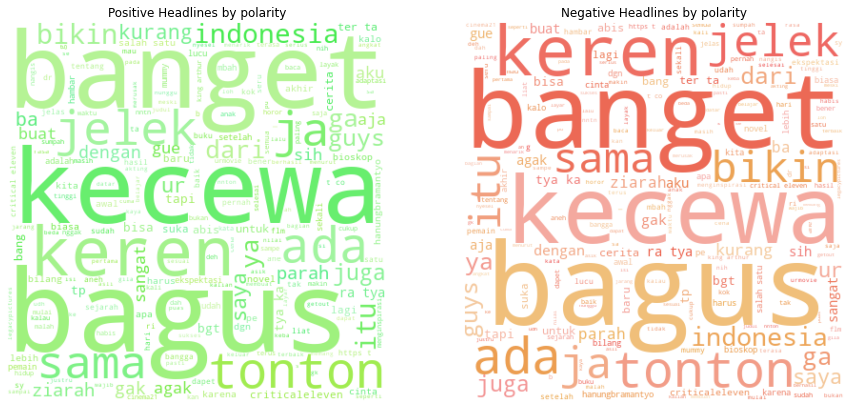

In [ ]:
pos_text_cln = " ".join(posdf['Text Tweet'])
neg_text_cln = " ".join(negdf['Text Tweet'])

# replacing some most common words present in these texts
noise_words = ['film', 'dan', 'ini', 'nonton', 'yg', 'yang', 'di', 'nya', 'kart']
for noise in noise_words:
    pos_text_cln = pos_text_cln.lower().replace(noise," ")
    neg_text_cln = neg_text_cln.lower().replace(noise, " ")

def green_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(85, 140), random.randint(60, 80))

def red_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(0, 35), random.randint(60, 80))
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 8])
wordcloud1 = WordCloud(background_color='white', height=400).generate(pos_text_cln)

ax1.imshow(wordcloud1.recolor(color_func=green_color, random_state=3),interpolation="bilinear")
ax1.axis('off');
ax1.set_title('Positive Headlines by polarity');

wordcloud2 = WordCloud(background_color='white', height=400).generate(neg_text_cln)
ax2.imshow(wordcloud2.recolor(color_func=red_color, random_state=3),interpolation="bilinear")
ax2.axis('off');
ax2.set_title('Negative Headlines by polarity');